# Module 11
### Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# import 
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# open a Chrome window with Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

In [3]:
# set the URL to a variable
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# send the browser to the URL
browser.visit(url)

In [4]:
# save the HTML from the browser
html = browser.html

# create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data in the 1 table 
table = soup.find('table', {'class': 'table'})
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [7]:
# store data using a list of dictionaries
# id, terrestrial_date, sol, ls, month, min_temp, pressure 

# create empty list 
rows = []

# loop though the data 
# skip the header row 
for row in table.find_all('tr')[1:]:  
    columns = row.find_all('td')
    id = columns[0].text.strip()
    terrestrial_date = columns[1].text.strip()
    sol = columns[2].text.strip()
    ls = columns[3].text.strip()
    month = columns[4].text.strip()
    min_temp = columns[5].text.strip()
    pressure = columns[6].text.strip()

 # create the row
    row = {
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    }
    rows.append(row)

# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
# Step 4: Prepare Data for Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
# 1: change terrestrial_date from string to date time
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# 2: change sol from string to int
df['sol'] = df['sol'].astype(int)

# 3: change ls from string to int
df['ls'] = df['ls'].astype(int)

# 4: change month from string to int
df['month'] = df['month'].astype(int)

# 5: change min_temp from string to float
df['min_temp'] = df['min_temp'].astype(float)

# 6: change pressure from string to float
df['pressure'] = df['pressure'].astype(float)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


In [12]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
# analyse data by using Pandas functions to answer the following questions:

In [14]:
# 1. How many months are there on Mars?
count_months_recorded = df.groupby('month').size()
count_months_recorded

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64

In [15]:
# 2. How many Martian days' worth of data are there?
number_of_days = df.month.count()
number_of_days

1867

In [16]:
# 3. What is the average low temperature by month
low_temp_avg = df.groupby('month')['min_temp'].mean()
low_temp_avg

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

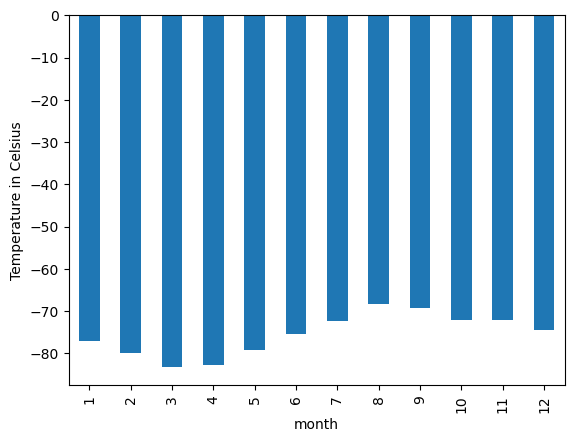

In [29]:
# Plot the average temperature by month
low_temp_avg.plot(kind='bar')
plt.ylabel('Temperature in Celsius')

# show
plt.show()

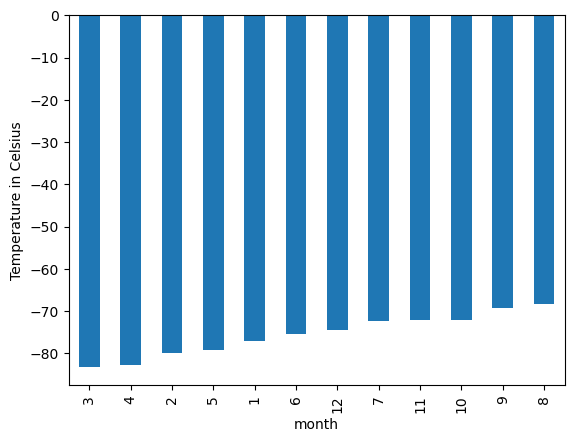

In [30]:
# Identify the coldest and hottest months in Curiosity's location
low_temp_sorted = low_temp_avg.sort_values()
low_temp_sorted.plot(kind='bar')
plt.ylabel('Temperature in Celsius')

# show
plt.show()

In [19]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

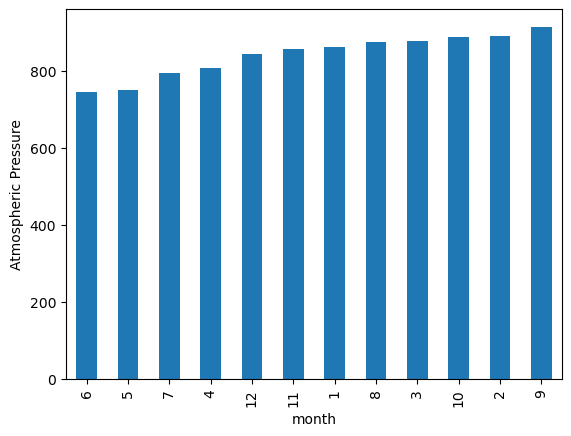

In [25]:
# Plot the average pressure by month
avg_pressure_sorted = avg_pressure.sort_values()
avg_pressure_sorted.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')

# show
plt.show()

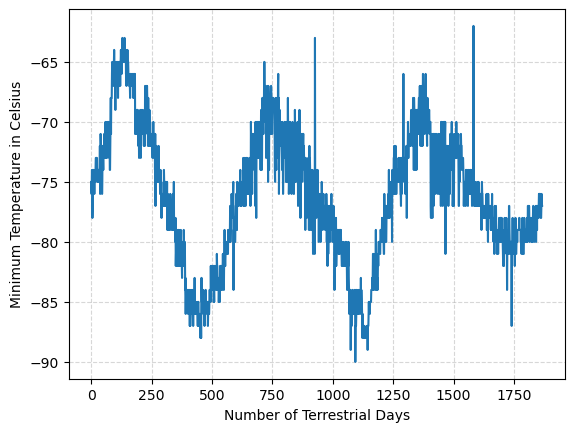

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.min_temp.plot()
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature in Celsius')
plt.grid(linestyle='--', alpha=0.5)
# show
plt.show()

The Curiosity Rover recorded 1867 martian days broken into 12 months.

The 3rd month is on average the coldest with the 8th month being warmest in this data set. 

The average atmospheric pressure is lowest in month 6 and highest in month 9. 

Looking at our temperature data, the peaks are roughly at day 125, 750 and 1375. Those day ranges are both 625 days apart. 

In [32]:
# save to a CSV
df.to_csv('mars_data.csv', index=False)

In [33]:
browser.quit()